<a href="https://colab.research.google.com/github/p09323028/2020f_NTU_Econometrics_I/blob/main/Textbook/CH8_Nonlinear_Regression_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 8: Nonlinear Regression Functions**
Author: Jinze Wu

Student Number: p09323028

前置作業:
- import 套件
- 載入資料
- 讀取資料
- 設置變數

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
!gdown --id '10Q4-t5L8KZjaxUqR8iGnmXx_lY9JYgSL' --output caschool.xlsx
!gdown --id '1FOmmL3eS70NCR7YFJ_FqS6e9GnFxF9aR' --output cps.xlsx

In [ ]:
caschool = pd.read_excel('caschool.xlsx')
cps = pd.read_excel('cps.xlsx')

**Decription of Data;**

dist_code -- district Code;

Read_scr  -- avg Reading Score;

Math_scr  -- avg Math Score;

County   --  county;

District -- District;

gr_span -- grade span of district;

enrl_tot -- total enrollment;

teachers -- number of teachers;

computer -- number of computers;

testscr -- avg test score (= (read_scr+math_scr)/2 );

comp_stu -- computers per student ( = computer/enrl_tot);

expn_stu -- expentitures per student;

str -- student teacher ration (teachers/enrl_tot);

el_pct -- percent of English Learners;

Meal_pct -- Percent qualifying for reduced-price lunch;

calw_pct -- Percent qualifying for CalWorks;

avginc -- district average income (in $1000's)

In [ ]:
caschool['avginc2'] = caschool.avginc * caschool.avginc
caschool['avginc3'] = caschool.avginc2 * caschool.avginc
caschool['loginc'] = np.log(caschool.avginc)
caschool['logtest'] = np.log(caschool.testscr)
caschool['loginc2'] = caschool.loginc * caschool.loginc
caschool['loginc3'] = caschool.loginc2 * caschool.loginc
caschool['histr'] = caschool.str.apply(lambda x: 1 if x>=20 else 0)
caschool['hiel'] = caschool.el_pct.apply(lambda x: 1 if x>=10 else 0)
caschool['hisxhie'] = caschool.histr * caschool.hiel
caschool['strxhiel'] = caschool.str * caschool.hiel
caschool['strxelpc'] = caschool.str * caschool.el_pct
caschool['sttr2'] = caschool.str * caschool.str
caschool['sttr3'] = caschool.sttr2 * caschool.str
caschool['str2hiel'] = caschool.sttr2 * caschool.hiel
caschool['str3hiel'] = caschool.sttr3 * caschool.hiel

## **8.1 A General Strategy for Modeling Nonlinear Regression Functions**

### Equation 8.2

$\widehat{TestScore} = \underset{(2.9)}{607.3} - \underset{(0.27)}{3.85} \times Income - \underset{(0.0048)}{0.0423} \times Income^2, \bar{R}^2=0.554$

In [ ]:
reg_8_2 = smf.ols(formula='testscr~avginc+avginc2', data=caschool)
results_8_2 = reg_8_2.fit(cov_type='HC1')  # robust
print(results_8_2.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     428.5
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          7.37e-102
Time:                        06:40:10   Log-Likelihood:                -1662.7
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     417   BIC:                             3344.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    607.3017      2.902    209.288      0.0

### FIGURE 8.3

In [ ]:
reg_f8_3 = smf.ols(formula='testscr~avginc', data=caschool)
results_f8_3 = reg_f8_3.fit(cov_type='HC1')  # robust

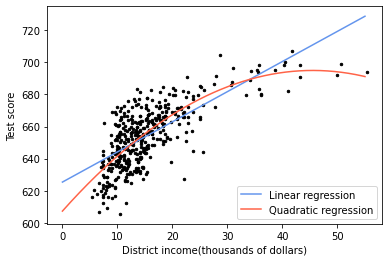

In [ ]:
a0, a1 = results_f8_3.params
b0, b1, b2 = results_8_2.params

x = np.linspace(0,55,1000)
y1 = a0 + a1 * x
y2 = b0 + b1 * x + b2 * (x**2)

plt.plot(x, y1, color='cornflowerblue')
plt.plot(x, y2, color='tomato')
plt.scatter(x=caschool.avginc, y=caschool.testscr,color='black' ,s=6)

plt.legend(['Linear regression', 'Quadratic regression'], loc='lower right')
plt.xlabel('District income(thousands of dollars)')
plt.ylabel('Test score')

plt.show()

## **8.2 Nonlinear Functions of a Single Independent Variable**

### Equation 8.11

$\widehat{TestScore} = \underset{(5.1)}{600.1} + \underset{(0.71)}{5.02} \times Income - \underset{(0.029)}{0.096} \times Income^2 - \underset{(0.00035)}{0.00069} \times Income^3, \bar{R}^2=0.555$

In [ ]:
reg_8_11 = smf.ols(formula='testscr~avginc+avginc2+avginc3', data=caschool)
results_8_11 = reg_8_11.fit(cov_type='HC1')  # robust
print(results_8_11.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     270.2
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.81e-97
Time:                        06:40:11   Log-Likelihood:                -1661.6
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     416   BIC:                             3347.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    600.0790      5.102    117.615      0.0

In [ ]:
# Test avginc2 avginc3
print(results_8_11.f_test(['avginc2=0','avginc3=0']))

<F test: F=array([[37.69077411]]), p=9.042596399197073e-16, df_denom=416, df_num=2>


### Equation 8.18

$\widehat{TestScore} = \underset{(3.8)}{557.8} - \underset{(1.40)}{36.42} \times ln(Income), \bar{R}^2 = 0.561$

In [ ]:
reg_8_18 = smf.ols(formula='testscr~loginc', data=caschool)
results_8_18 = reg_8_18.fit(cov_type='HC1')  # robust
print(results_8_18.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     679.7
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.15e-89
Time:                        06:40:11   Log-Likelihood:                -1659.7
No. Observations:                 420   AIC:                             3323.
Df Residuals:                     418   BIC:                             3331.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    557.8323      3.840    145.271      0.0

### FIGURE 8.5

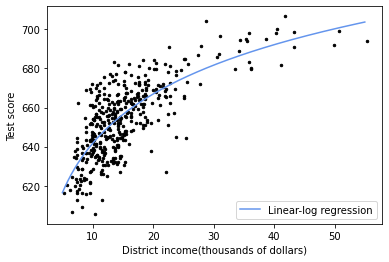

In [ ]:
b0, b1 = results_8_18.params

x = np.linspace(5,55,1000)
y = b0 + b1 * np.log(x)

plt.plot(x, y, color='cornflowerblue', )
plt.scatter(x=caschool.avginc, y=caschool.testscr,color='black' ,s=6)

plt.legend(['Linear-log regression'], loc='lower right')
plt.xlabel('District income(thousands of dollars)')
plt.ylabel('Test score')

plt.show()

### Equation 8.20

$\widehat{ln(Earning)} = \underset{(0.019)}{2.876} + \underset{(0.0004)}{0.0095} Age, \bar{R}^2 = 0.033$

In [ ]:
cps.head()

,ahe,yrseduc,female,age,northeast,midwest,south,west
0,21.367521,13,1,65,1,0,0,0
1,24.038462,16,0,56,1,0,0,0
2,7.692307,12,0,42,1,0,0,0
3,15.182186,12,1,42,1,0,0,0
4,20.614346,14,1,53,1,0,0,0


In [ ]:
cps = cps[(cps.age>=21)&(cps.age<=64)]
cps = cps[cps.yrseduc==16]

cps['lahe'] = np.log(cps.ahe)

In [ ]:
reg_8_20 = smf.ols(formula='lahe~age', data=cps)
results_8_20 = reg_8_20.fit(cov_type='HC1')  # robust
print(results_8_20.summary())

                            OLS Regression Results                            
Dep. Variable:                   lahe   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     451.7
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.16e-98
Time:                        06:40:11   Log-Likelihood:                -11722.
No. Observations:               13822   AIC:                         2.345e+04
Df Residuals:                   13820   BIC:                         2.346e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8765      0.019    152.631      0.0

### Equation 8.23

$\widehat{ln(TestScore)} = \underset{(0.006)}{6.336} +\underset{(0.0021)}{0.0554} ln(Income), \bar{R}^2 = 0.557$

In [ ]:
reg_8_23 = smf.ols(formula='logtest~loginc', data=caschool)
results_8_23 = reg_8_23.fit(cov_type='HC1')  # robust
print(results_8_23.summary())

                            OLS Regression Results                            
Dep. Variable:                logtest   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     667.8
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.13e-88
Time:                        06:40:11   Log-Likelihood:                 1061.2
No. Observations:                 420   AIC:                            -2118.
Df Residuals:                     418   BIC:                            -2110.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3363      0.006   1069.501      0.0

### Equation 8.24

$\widehat{ln(TestScore)} = \underset{(0.003)}{6.439} +\underset{(0.00018)}{0.00284} Income, \bar{R}^2 = 0.497$

In [ ]:
reg_8_24 = smf.ols(formula='logtest~avginc', data=caschool)
results_8_24 = reg_8_24.fit(cov_type='HC1')  # robust
print(results_8_24.summary())

                            OLS Regression Results                            
Dep. Variable:                logtest   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     263.9
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.40e-46
Time:                        06:40:11   Log-Likelihood:                 1034.7
No. Observations:                 420   AIC:                            -2065.
Df Residuals:                     418   BIC:                            -2057.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4394      0.003   2225.210      0.0

### FIGURE 8.6

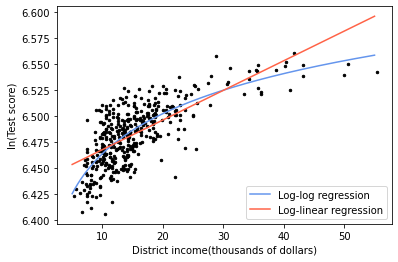

In [ ]:
a0, a1 = results_8_23.params  # log-log
b0, b1 = results_8_24.params  # log-linear

x = np.linspace(5,55,1000)
y1 = a0 + a1 * np.log(x)
y2 = b0 + b1 * x

plt.plot(x, y1, color='cornflowerblue')
plt.plot(x, y2, color='tomato')
plt.scatter(x=caschool.avginc, y=caschool.logtest ,color='black' ,s=6)

plt.legend(['Log-log regression', 'Log-linear regression'], loc='lower right')
plt.xlabel('District income(thousands of dollars)')
plt.ylabel('ln(Test score)')

plt.show()

### Equation 8.26

$\widehat{TestScore} = \underset{(79.4)}{4.861} + \underset{(87.9)}{113.4} ln(Income) - \underset{(31.7)}{26.9} [ln(Income)]^2 + \underset{(3.74)}{3.06} [ln(Income)]^3, \bar{R}^2 = 0.560$

In [ ]:
reg_8_26 = smf.ols(formula='testscr~loginc+loginc2+loginc3', data=caschool)
results_8_26 = reg_8_26.fit(cov_type='HC1')  # robust
print(results_8_26.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     255.2
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           6.68e-94
Time:                        06:40:11   Log-Likelihood:                -1659.4
No. Observations:                 420   AIC:                             3327.
Df Residuals:                     416   BIC:                             3343.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    486.1345     79.383      6.124      0.0

## **8.3 Interactions Between Independent Variables**

### Equation 8.30

$\widehat{TestScore} = \underset{(1.4)}{664.1} -\underset{(1.9)}{1.9} HiSTR -\underset{(2.3)}{18.2} HiEL - \underset{(3.1)}{3.5}(HiSTR \times HiEL)$

In [ ]:
reg_8_30 = smf.ols(formula='testscr~hiel+histr+hisxhie', data=caschool)
results_8_30 = reg_8_30.fit(cov_type='HC1')  # robust
print(results_8_30.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     60.20
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.44e-32
Time:                        06:40:11   Log-Likelihood:                -1759.7
No. Observations:                 420   AIC:                             3527.
Df Residuals:                     416   BIC:                             3544.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    664.1433      1.388    478.459      0.0

### Equation 8.34

$\widehat{TestScore} = \underset{(11.9)}{682.2} -\underset{(0.59)}{0.97} STR -\underset{(19.5)}{5.6} HiEL - \underset{(0.97)}{1.28}(STR \times HiEL)$

In [ ]:
reg_8_34 = smf.ols(formula='testscr~str+hiel+strxhiel', data=caschool)
results_8_34 = reg_8_34.fit(cov_type='HC1')  # robust
print(results_8_34.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     63.67
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           6.74e-34
Time:                        06:47:44   Log-Likelihood:                -1755.3
No. Observations:                 420   AIC:                             3519.
Df Residuals:                     416   BIC:                             3535.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    682.2458     11.868     57.487      0.0

### Equation 8.37

$\widehat{TestScore} = \underset{(11.8)}{686.3} -\underset{(0.59)}{1.12} STR -\underset{(0.37)}{0.67} PctEL - \underset{(0.019)}{0.0012}(STR \times PctEL)$

In [ ]:
reg_8_37 = smf.ols(formula='testscr~str+el_pct+strxelpc', data=caschool)
results_8_37 = reg_8_37.fit(cov_type='HC1')  # robust
print(results_8_37.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     155.0
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.89e-67
Time:                        07:04:37   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3441.
Df Residuals:                     416   BIC:                             3457.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.3385     11.759     58.365      0.0

## **8.4 Nonlinear Effects on Test Scores of the Student–Teacher Ratio**

### Table 8.3

In [ ]:
# column(1)
reg_t8_3_1 = smf.ols(formula='testscr~str+el_pct+meal_pct', data=caschool)
results_t8_3_1 = reg_t8_3_1.fit(cov_type='HC1')  # robust
print(results_t8_3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     453.5
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          1.05e-130
Time:                        07:06:43   Log-Likelihood:                -1520.5
No. Observations:                 420   AIC:                             3049.
Df Residuals:                     416   BIC:                             3065.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.1500      5.568    125.735      0.0

In [ ]:
# column(2)
reg_t8_3_2 = smf.ols(formula='testscr~str+el_pct+meal_pct+loginc', data=caschool)
results_t8_3_2 = reg_t8_3_2.fit(cov_type='HC1')  # robust
print(results_t8_3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     417.2
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          6.40e-144
Time:                        07:07:13   Log-Likelihood:                -1499.3
No. Observations:                 420   AIC:                             3009.
Df Residuals:                     415   BIC:                             3029.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    658.5520      8.642     76.208      0.0

In [ ]:
# column(3)
reg_t8_3_3 = smf.ols(formula='testscr~str+hiel+strxhiel', data=caschool)
results_t8_3_3 = reg_t8_3_3.fit(cov_type='HC1')  # robust
print(results_t8_3_3.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     63.67
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           6.74e-34
Time:                        07:07:38   Log-Likelihood:                -1755.3
No. Observations:                 420   AIC:                             3519.
Df Residuals:                     416   BIC:                             3535.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    682.2458     11.868     57.487      0.0

In [ ]:
print(results_t8_3_3.f_test(['str=0', 'strxhiel=0']))

<F test: F=array([[5.63810394]]), p=0.003837081057943413, df_denom=416, df_num=2>


In [ ]:
# column(4)
reg_t8_3_4 = smf.ols(formula='testscr~str+hiel+strxhiel+meal_pct+loginc', data=caschool)
results_t8_3_4 = reg_t8_3_4.fit(cov_type='HC1')  # robust
print(results_t8_3_4.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     335.8
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          3.32e-143
Time:                        07:09:59   Log-Likelihood:                -1498.1
No. Observations:                 420   AIC:                             3008.
Df Residuals:                     414   BIC:                             3032.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    653.6661      9.869     66.232      0.0

In [ ]:
print(results_t8_3_4.f_test(['str=0', 'strxhiel=0']))

<F test: F=array([[5.92210939]]), p=0.0029118177310633966, df_denom=414, df_num=2>


In [ ]:
# column(5)
reg_t8_3_5 = smf.ols(formula='testscr~str+sttr2+sttr3+hiel+meal_pct+loginc', data=caschool)
results_t8_3_5 = reg_t8_3_5.fit(cov_type='HC1')  # robust
print(results_t8_3_5.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     281.1
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.03e-142
Time:                        07:11:10   Log-Likelihood:                -1494.2
No. Observations:                 420   AIC:                             3002.
Df Residuals:                     413   BIC:                             3031.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    252.0509    163.634      1.540      0.1

In [ ]:
print(results_t8_3_5.f_test(['str=0', 'sttr2=0', 'sttr3=0']))
print(results_t8_3_5.f_test(['sttr2=0', 'sttr3=0']))

<F test: F=array([[6.31296039]]), p=0.0003403287675209415, df_denom=413, df_num=3>
<F test: F=array([[6.16628641]]), p=0.0022973166587268597, df_denom=413, df_num=2>


In [ ]:
# column(6)
reg_t8_3_6 = smf.ols(formula='testscr~str+sttr2+sttr3+hiel+strxhiel+str2hiel+str3hiel+meal_pct+loginc', data=caschool)
results_t8_3_6 = reg_t8_3_6.fit(cov_type='HC1')  # robust
print(results_t8_3_6.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     199.8
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          6.56e-144
Time:                        07:13:04   Log-Likelihood:                -1492.1
No. Observations:                 420   AIC:                             3004.
Df Residuals:                     410   BIC:                             3045.
Df Model:                           9                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    122.3542    185.519      0.660      0.5

In [ ]:
print(results_t8_3_6.f_test(['str=0', 'sttr2=0', 'sttr3=0','strxhiel=0','str2hiel=0','str3hiel']))
print(results_t8_3_6.f_test(['sttr2=0', 'sttr3=0']))
print(results_t8_3_6.f_test(['strxhiel=0','str2hiel=0','str3hiel']))

<F test: F=array([[4.96166765]]), p=6.415828315336075e-05, df_denom=410, df_num=6>
<F test: F=array([[5.80629655]]), p=0.0032614287804590193, df_denom=410, df_num=2>
<F test: F=array([[2.69024625]]), p=0.045969318151175616, df_denom=410, df_num=3>


In [ ]:
# column(7)
reg_t8_3_7 = smf.ols(formula='testscr~str+sttr2+sttr3+el_pct+meal_pct+loginc', data=caschool)
results_t8_3_7 = reg_t8_3_7.fit(cov_type='HC1')  # robust
print(results_t8_3_7.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     280.8
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.47e-142
Time:                        07:14:59   Log-Likelihood:                -1494.6
No. Observations:                 420   AIC:                             3003.
Df Residuals:                     413   BIC:                             3031.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    244.8090    165.722      1.477      0.1

In [ ]:
print(results_t8_3_7.f_test(['str=0', 'sttr2=0', 'sttr3=0']))
print(results_t8_3_7.f_test(['sttr2=0', 'sttr3=0']))

<F test: F=array([[5.9071041]]), p=0.0005923758524584682, df_denom=413, df_num=3>
<F test: F=array([[5.95788894]]), p=0.00281284361867873, df_denom=413, df_num=2>


## **8.5 Conclusion**